<a href="https://colab.research.google.com/github/peta-byte/colab/blob/master/Chapter_10_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Question 4

# Data
x_last = np.array([2.0,1.8,3.7,2.2,2.1,2.4,2.6,2.8,3.3,3.5,3.7,3.8,4.5,4.7,4.0,4.0,1.7,1.8,4.9,4.2,4.3])  # Duration of Eruption in mins (LAST)
y_next = np.array([50,57,55,47,53,50,62,57,72,62,63,70,85,75,77,70,43,48,70,79,72])  # Time Between Eruptions in mins (NEXT)

print(x_last.shape, y_next.shape)

(21,) (21,)


<ipython-input-3-6294fe8fa6e0>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


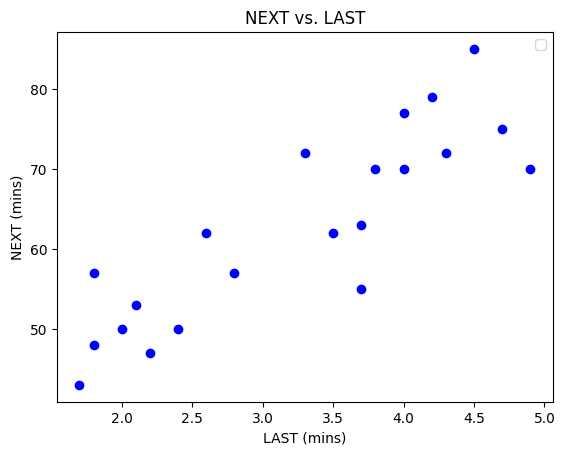

In [3]:
# a) Scatter plot of NEXT vs LAST. Does the relationship appear to be approximately linear?

import matplotlib.pyplot as plt

# Plot data on Scatter plot
plt.scatter(x_last, y_next, color="blue")
plt.xlabel("LAST (mins)")
plt.ylabel("NEXT (mins)")
plt.title("NEXT vs. LAST")
plt.legend()
plt.show()

# Yes, the relationship is approximately linear.

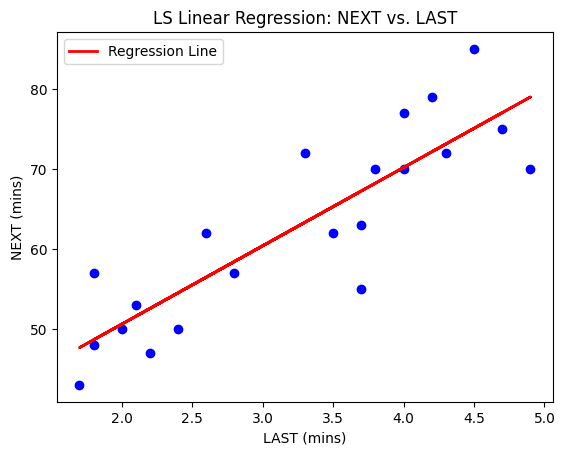

In [10]:
# b) Fit a Least Squares regression line. Predict the time to the next eruption if the last eruption lasted 3 minutes.

# Add a constant for intercept
x_last_with_intercept = sm.add_constant(x_last) # eruption cannot last for 0 mins

# Fit regression model
model_last_next = sm.OLS(y_next, x_last_with_intercept).fit()

# Predictions
y_next_pred = model_last_next.predict(x_last_with_intercept)

# Plot
plt.scatter(x_last, y_next, color="blue")
plt.plot(x_last, y_next_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("LAST (mins)")
plt.ylabel("NEXT (mins)")
plt.title("LS Linear Regression: NEXT vs. LAST")
plt.legend()
plt.show()

In [40]:
new_last = sm.add_constant(np.array([1, 3.0])) # sm.add_constant does not work as expected with 1x1 array
predicted_next = model_last_next.predict(new_last)

print(f"Predicted NEXT for LAST {new_last[1,1]} mins: {predicted_next[1]: .4f} mins")

Predicted NEXT for LAST 3.0 mins:  60.3833 mins


In [41]:
# C) Co-efficient of Determination - What variability in NEXT is explained by LAST? Does it suggest that LAST is a good predictor of NEXT?

# Compute R^2
r2 = model_last_next.rsquared

print(f"R-squared (R²): {r2:.4f}")

# R^2 value is close to 0.7491 suggesting a strong linear relationship and about 74% of variation in NEXT is explained by LAST. LAST is a good predictor of NEXT.

R-squared (R²): 0.7491


In [42]:
# d) Mean Square Error (MSE)

# Compute MSE
mse = model_last_next.mse_resid

print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 37.5625


In [43]:
# Question 6

# Data
x_pressure = np.array([20.79,20.79,22.40,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06])  # Pressure (Inches of Mercury)
y_boil = np.array([194.5,194.3,197.9,198.4,199.4,199.9,200.9,201.1,201.4,201.3,203.6,204.6,209.5,208.6,210.7,211.9,212.2])  # Boiling Point (Fahrenheit)

print(x_pressure.shape, y_boil.shape)

(17,) (17,)


<ipython-input-44-e82028752a85>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


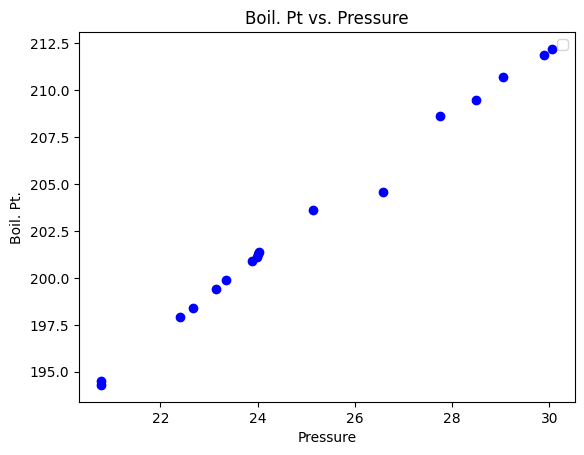

In [44]:
# a) Scatter plot of Boiling Point by Barometric Pressure. Does the relationship appear to be approximately linear?

# Plot data on Scatter plot
plt.scatter(x_pressure, y_boil, color="blue")
plt.xlabel("Pressure")
plt.ylabel("Boil. Pt.")
plt.title("Boil. Pt vs. Pressure")
plt.legend()
plt.show()

# Yes, the relationship is approximately linear.

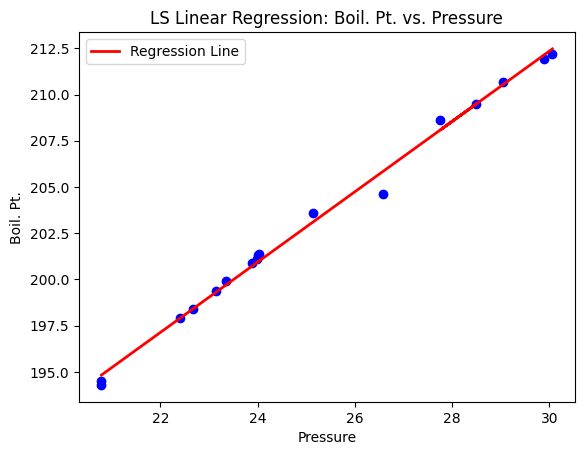

In [45]:
# b) Fit a Least Squares regression line. Co-efficient of Determination - What variability in the Boil. Pt. is explained by Pressure?

# Add a constant for intercept
x_pressure_with_intercept = sm.add_constant(x_pressure) # pressure cannot be 0

# Fit regression model
model_pressure_boil = sm.OLS(y_boil, x_pressure_with_intercept).fit()

# Predictions
y_boil_pred = model_pressure_boil.predict(x_pressure_with_intercept)

# Plot
plt.scatter(x_pressure, y_boil, color="blue")
plt.plot(x_pressure, y_boil_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Pressure")
plt.ylabel("Boil. Pt.")
plt.title("LS Linear Regression: Boil. Pt. vs. Pressure")
plt.legend()
plt.show()

In [46]:
# Compute R^2
r2 = model_pressure_boil.rsquared

print(f"R-squared (R²): {r2:.4f}")

# R^2 value is close to 0.9944 suggesting a very strong linear relationship and about 99% of variation in Boil. Pt. is explained by Pressure.

R-squared (R²): 0.9944


In [47]:
# c) Mean Square Error (MSE)

# Compute MSE
mse = model_pressure_boil.mse_resid

print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.1972


In [52]:
# Question 10

# a) Calculate 95% CI for the Boil. Pt. if the Pressure is 28.
new_pressure = sm.add_constant(np.array([1, 28.0])) # sm.add_constant does not work as expected with 1x1 array
predicted_boil = model_pressure_boil.predict(new_pressure)

print(f"Predicted Boil. Pt. for Pressure {new_pressure[1,1]} in: {predicted_boil[1]: .4f} F")

Predicted Boil. Pt. for Pressure 28.0 in:  208.5464 F


In [54]:
# Calculate the Standard Error
n = len(x_pressure)
df = n - 2
mse = model_pressure_boil.mse_resid
se = np.sqrt(mse * (1/n + (new_pressure[1,1] - x_pressure.mean())**2 / np.sum((x_pressure - x_pressure.mean())**2)))

# Calculate the margin of error (using t-distribution)
alpha = 1 - 0.95
t_value = stats.t.ppf(1 - alpha/2, df=df) # two-tailed
margin_of_error = t_value * se

# Calculate the confidence interval
lower_bound = predicted_boil[1] - margin_of_error
upper_bound = predicted_boil[1] + margin_of_error

print(f"95% Confidence Interval for Boiling Point at Pressure = 28: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Boiling Point at Pressure = 28: (208.22, 208.87)


In [55]:
# c) Calculate 95% CI for the Boil. Pt. if the Pressure is 31.
new_pressure = sm.add_constant(np.array([1, 31.0]))
predicted_boil = model_pressure_boil.predict(new_pressure)

print(f"Predicted Boil. Pt. for Pressure {new_pressure[1,1]} in: {predicted_boil[1]: .4f} F")

Predicted Boil. Pt. for Pressure 31.0 in:  214.2518 F


In [56]:
# Calculate the Standard Error
n = len(x_pressure)
df = n - 2
mse = model_pressure_boil.mse_resid
se = np.sqrt(mse * (1/n + (new_pressure[1,1] - x_pressure.mean())**2 / np.sum((x_pressure - x_pressure.mean())**2)))

# Calculate the margin of error (using t-distribution)
alpha = 1 - 0.95
t_value = stats.t.ppf(1 - alpha/2, df=df) # two-tailed
margin_of_error = t_value * se

# Calculate the confidence interval
lower_bound = predicted_boil[1] - margin_of_error
upper_bound = predicted_boil[1] + margin_of_error

print(f"95% Confidence Interval for Boiling Point at Pressure = 31: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Boiling Point at Pressure = 31: (213.73, 214.77)


In [57]:
# Question 17

# Data
x_t = np.array([1,5,15,30,60,120,240,480,720,1440,2880,5760,10080])  # Time in minutes
y_p = np.array([0.84,0.71,0.61,0.56,0.54,0.47,0.45,0.38,0.36,0.26,0.20,0.16,0.08])  # Proportion of Items

print(x_t.shape, y_p.shape)

(13,) (13,)


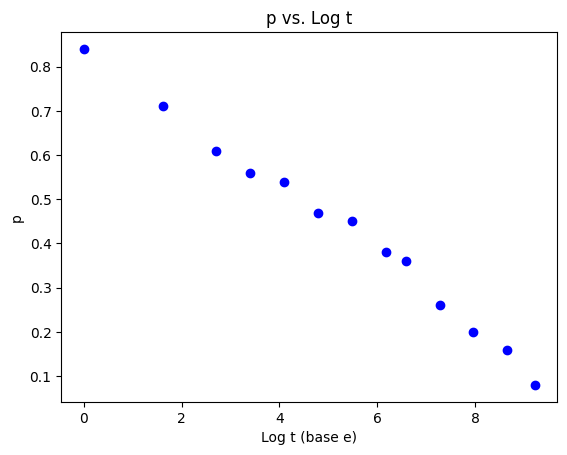

In [58]:
# a) Plot p vs natural Log of t. Is the relationship approximately linear?
x_t_log = np.log(x_t)

# Plot data on Scatter plot
plt.scatter(x_t_log, y_p, color="blue")
plt.xlabel("Log t (base e)")
plt.ylabel("p")
plt.title("p vs. Log t")
plt.show()

# Yes, the relationship is approximately linear.

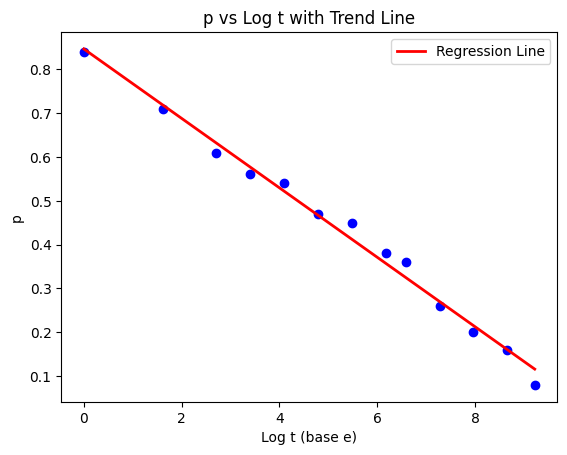

In [59]:
# b) Fit a trend line. Estimate the time for 50% retention.

# Add a constant for intercept
x_t_log_with_intercept = sm.add_constant(x_t_log) # pressure cannot be 0

# Fit regression model
model_t_log_p = sm.OLS(y_p, x_t_log_with_intercept).fit()

# Predictions
y_p_pred = model_t_log_p.predict(x_t_log_with_intercept)


# Plot
plt.scatter(x_t_log, y_p, color="blue")
plt.plot(x_t_log, y_p_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Log t (base e)")
plt.ylabel("p")
plt.title("p vs Log t with Trend Line")
plt.legend()
plt.show()

In [62]:
# Estimate time for 50% retention (p = 0.5)

# Model Inverse
model_t_log_p_inverse = sm.OLS(x_t_log, sm.add_constant(y_p)).fit()

new_p = sm.add_constant(np.array([1, 0.5]))
predicted_t_log = model_t_log_p.predict()
print(f"Predicted  t for p = {new_p[1,1]}: {np.exp(predicted_t_log[1]):.4f}")

Predicted  t for p = 0.5: 2.0522


In [63]:
# Question 18

# Data
x_planet = np.array([1,2,3,4,5,6,7,8,9,10])  # Planet No.
y_dist = np.array([47.163,67.235,92.960,141.61,313.00,483.60,886.70,1783.0,2794.0,3666.0])  # Avg. distance from Sun

print(x_planet.shape, y_dist.shape)

(10,) (10,)


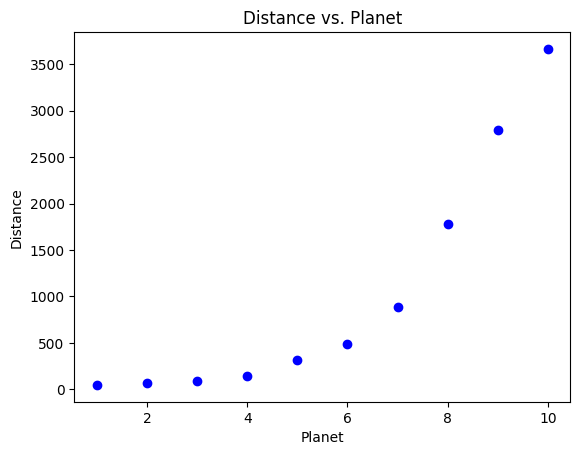

In [64]:
# a) Transform the data and plot distance from the sun against the planet to get a linear relationship.

# Plot data on Scatter plot to examine relationship
plt.scatter(x_planet, y_dist, color="blue")
plt.xlabel("Planet")
plt.ylabel("Distance")
plt.title("Distance vs. Planet")
plt.show()


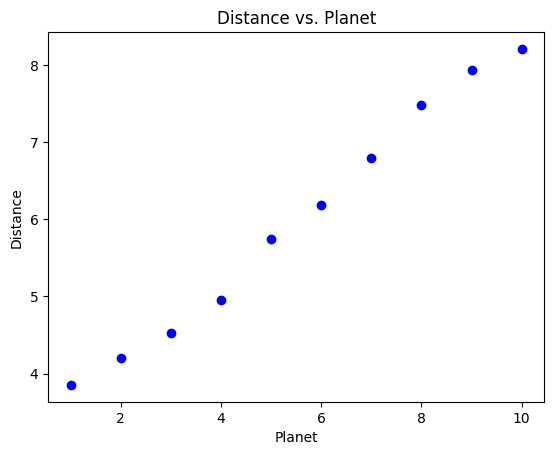

In [65]:
y_dist_log = np.log(y_dist) # since the points curved upwards signifying an exponentional relationship

# Plot data on Scatter plot
plt.scatter(x_planet, y_dist_log, color="blue")
plt.xlabel("Planet")
plt.ylabel("Distance")
plt.title("Distance vs. Planet")
plt.show()

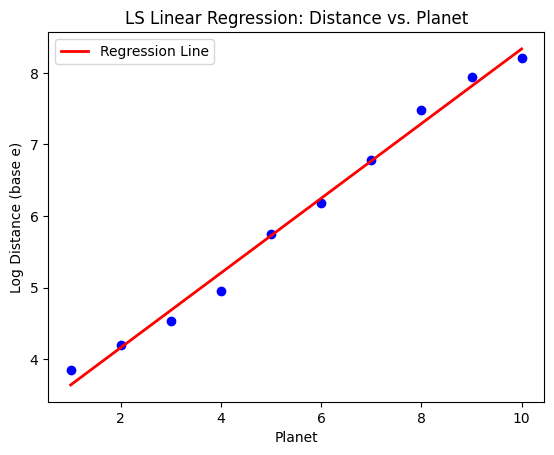

In [66]:
# b) Fit a Least Squares regression line.

# Add a constant for intercept
x_planet_with_intercept = sm.add_constant(x_planet) # distance from sun cannot be 0

# Fit regression model
model_planet_dist = sm.OLS(y_dist_log, x_planet_with_intercept).fit()

# Predictions
y_dist_log_pred = model_planet_dist.predict(x_planet_with_intercept)

# Plot
plt.scatter(x_planet, y_dist_log, color="blue")
plt.plot(x_planet, y_dist_log_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Planet")
plt.ylabel("Log Distance (base e)")
plt.title("LS Linear Regression: Distance vs. Planet")
plt.legend()
plt.show()

In [69]:
# c) Predict distance of Planet X (after Pluto) from the Sun
planet_x = sm.add_constant(np.array([1, 11]))
predicted_dist_log = model_planet_dist.predict(planet_x)

print(f"Predicted  t for p = {planet_x[1,1]}: {np.exp(predicted_dist_log[1]):.4f}")

Predicted  t for p = 11.0: 7008.5773


In [70]:
# Question 20

# Data
x_speed = np.array([20,20,30,30,40,40,50,50,60,60])  # Speed (mph)
y_stop_dist = np.array([16.3,26.7,39.2,63.5,65.7,98.4,104.1,155.6,217.2,160.8])  # Stopping Distance (ft)

print(x_speed.shape, y_stop_dist.shape)


(10,) (10,)


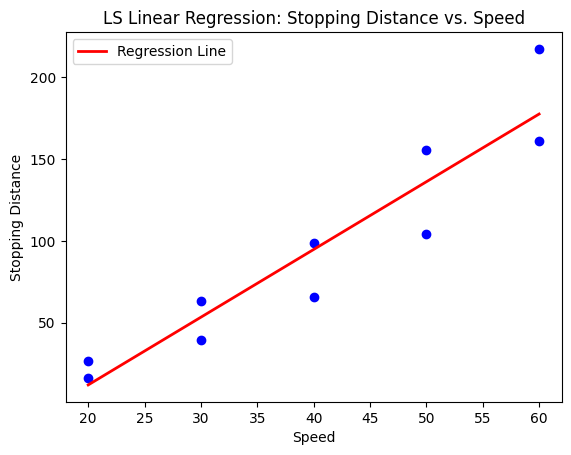

In [71]:
# a) Fit a Regression Line and plot residuals against speed.


# Add a constant for intercept
x_speed_with_intercept = sm.add_constant(x_speed) # distance from sun cannot be 0

# Fit regression model
model_speed_stop_dist = sm.OLS(y_stop_dist, x_speed_with_intercept).fit()

# Predictions
y_stop_dist_pred = model_speed_stop_dist.predict(x_speed_with_intercept)

# Plot
plt.scatter(x_speed, y_stop_dist, color="blue")
plt.plot(x_speed, y_stop_dist_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Speed")
plt.ylabel("Stopping Distance")
plt.title("LS Linear Regression: Stopping Distance vs. Speed")
plt.legend()
plt.show()

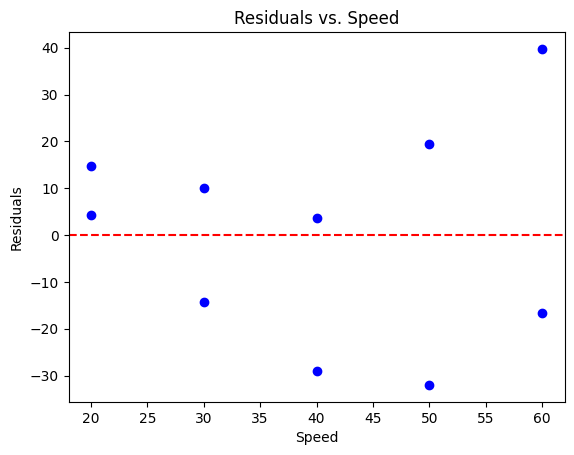

In [72]:
# Plot Residuals
residuals = model_speed_stop_dist.resid
plt.scatter(x_speed, residuals, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Speed")
plt.ylabel("Residuals")
plt.title("Residuals vs. Speed")
plt.show()

In [73]:
# b) Comment on the goodness of fit based on overall F-statistic and residual plot. Which 2 assumptions
# of linear regression seem to be violated?

# Calculate F-statistic
f_value = model_speed_stop_dist.fvalue
p_value = model_speed_stop_dist.f_pvalue

print(f"F-statistic: {f_value:.4f}")
print(f"p-value: {p_value: .4f}")

# A large F-statistic and small p-value signify that the model is statistically significant.
# The speed is significantly related to the stopping distance.

# Plot of residuals reveals that the following conditions for Linear Regression have been violated:
# Homoscedasticity - the spread of residuals is wider on the far right than the far left


F-statistic: 58.7682
p-value:  0.0001


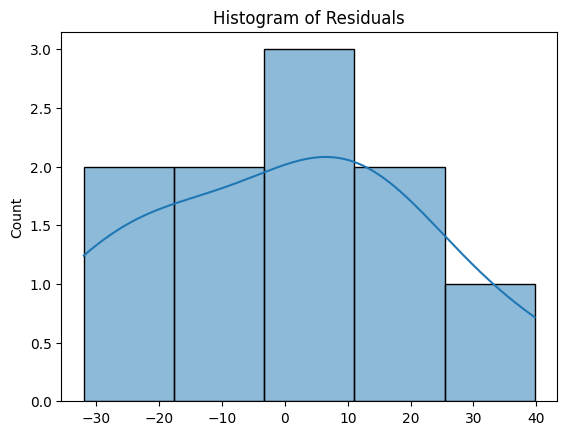

In [74]:
# Normality Check

import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

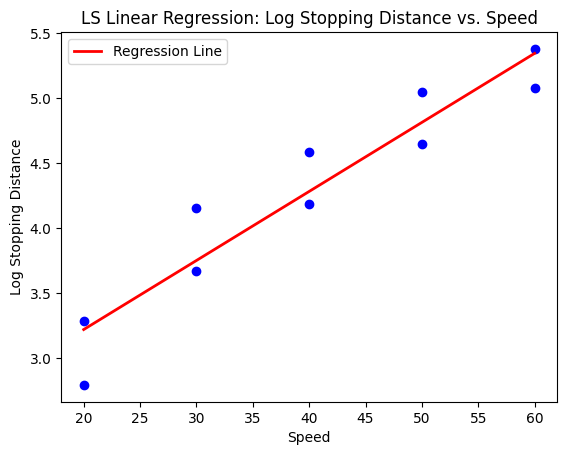

Since, the data points are curving upwards, signifying an exponential relationship, a logarithmic transformation of the response values should linearize the relationship


In [87]:
# c) What transformation of stopping distance should be used to linearize the relationship?

y_stop_dist_log = np.log(y_stop_dist)

# Fit regression model
model_speed_stop_dist_log = sm.OLS(y_stop_dist_log, x_speed_with_intercept).fit()

# Predictions
y_stop_dist_log_pred = model_speed_stop_dist_log.predict(x_speed_with_intercept)

# Plot
plt.scatter(x_speed, y_stop_dist_log, color="blue")
plt.plot(x_speed, y_stop_dist_log_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Speed")
plt.ylabel("Log Stopping Distance")
plt.title("LS Linear Regression: Log Stopping Distance vs. Speed")
plt.legend()
plt.show()

print("Since, the data points are curving upwards, signifying an exponential relationship, a logarithmic transformation of the response values should linearize the relationship")

In [83]:
# d) What is the predicted stopping distance based on this transformed model if the car is travelling at 40 mph?

new_speed = sm.add_constant(np.array([1, 40]))
predicted_stop_dist_log = model_speed_stop_dist_log.predict(new_speed)

print(f"Predicted  t for p = {new_speed[1,1]}: {np.exp(predicted_stop_dist_log[1]):.4f}")

Predicted  t for p = 40.0: 72.4090


In [77]:
# Question 28

# Data
x_h = np.array([135,146,153,154,139,131,149,137,143,146,141,136,154,151,155,133,149,141,164,146,149,147,152,140,143,148,149,141,137,135])  # Heights (cm)
y_w = np.array([26,33,55,50,32,25,44,31,36,35,28,28,36,48,36,31,34,32,47,37,46,36,47,33,42,32,32,29,34,30])  # Weights (Kg)

print(x_h.shape, y_w.shape)

(30,) (30,)


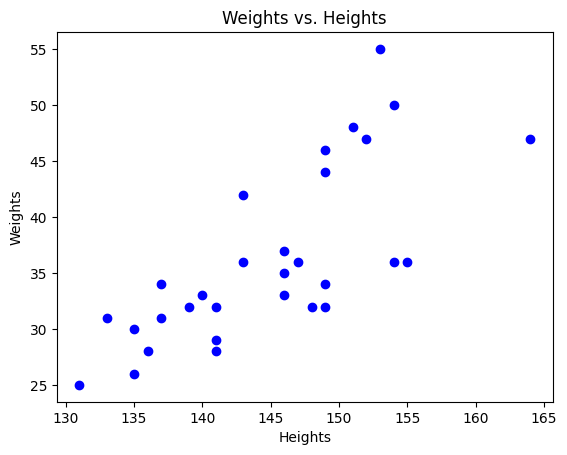

In [78]:
# a) Plot Weights vs Heights

plt.scatter(x_h, y_w, color="blue")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("Weights vs. Heights")
plt.show()

In [79]:
# b) Calculate the correlation coefficient.

from scipy.stats import pearsonr

alpha = 0.05
H0 = 'Not significantly correlated'
H1 = 'Significantly correlated'

correlation_coefficient, p_value = pearsonr(x_h, y_w)

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"Reject the null hypothesis. {H1}")
else:
    print(f"Fail to reject the null hypothesis. {H0}")


# There's a positive relationship between weights and heights -- as height increases so does weight.

Correlation Coefficient: 0.7424
P-value: 0.0000
Reject the null hypothesis. Significantly correlated
